<a href="https://colab.research.google.com/github/sujithm21/Car_price_prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing the dependencies/libraries/required modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data preprocessing

In [ ]:
dataset = pd.read_csv('car data.csv')


In [ ]:
#to print first 5 dataset we us head
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#checking no of rows and columns
dataset.shape

(301, 9)

In [ ]:
#getting some information of our data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#checking the no.of missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking the distribution of categorical data
print(dataset.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


encoding categorical data

In [ ]:
# encoding "Fuel_Type" Column
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
#splitting data and target
X = dataset.drop(['Car_Name','Selling_Price'],axis =1)
Y = dataset['Selling_Price']

Splitting training and test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.1,random_state =2)

Model Training


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

Evaluating Model

In [ ]:
#prediction on training data
train_ped = lin_reg.predict(X_train)

In [ ]:
# R squared
error_score = metrics.r2_score(Y_train,train_ped)
print(error_score)

0.8799451660493711


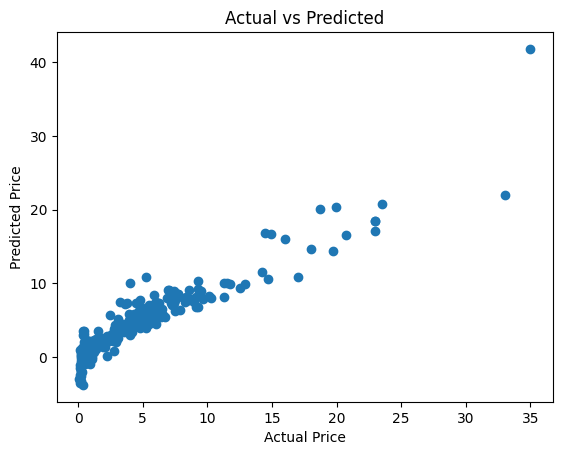

In [ ]:
#visualising
plt.scatter(Y_train,train_ped)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
# test results
test_ped = lin_reg.predict(X_test)


In [ ]:
# error
error_score_2 = metrics.r2_score(Y_test,test_ped)
print(error_score_2)

0.8365766715027051


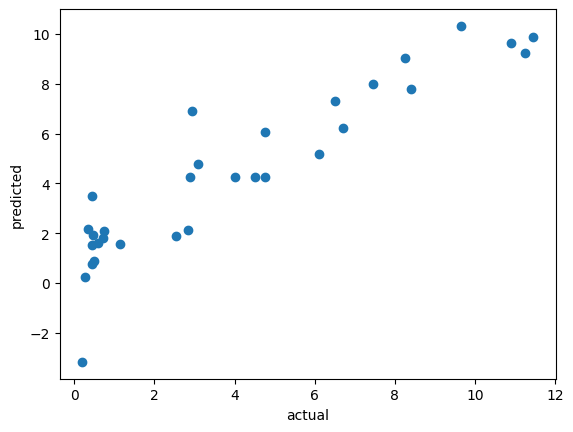

In [ ]:
#visualising
plt.scatter(Y_test,test_ped)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()